# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Image loaded successfully from /content/pexels-photo-19289109.jpeg


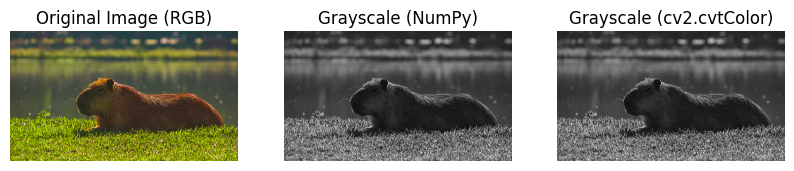


Shape of RGB image: (3411, 6000, 3)
Shape of NumPy grayscale image: (3411, 6000)
Shape of cv2.cvtColor grayscale image: (3411, 6000)

Few pixel values of RGB image (top-left 2x2):
[[[47 63 63]
  [45 61 61]]

 [[47 61 62]
  [44 60 60]]]

Few pixel values of NumPy grayscale image (top-left 2x2):
[[58 56]
 [56 55]]

Few pixel values of cv2.cvtColor grayscale image (top-left 2x2):
[[58 56]
 [57 55]]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
image_path = '/content/pexels-photo-19289109.jpeg'
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Image not found at {image_path}")
else:
    print(f"Image loaded successfully from {image_path}")

    # 1. Display it in RGB
    # OpenCV loads images in BGR format, convert to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image (RGB)')
    plt.axis('off')

    # 2. Convert to grayscale using NumPy (weighted sum formula)
    # The standard formula for luminance (grayscale) conversion is:
    # Y = 0.2989 * R + 0.5870 * G + 0.1140 * B
    # Note: img_rgb already has channels in RGB order
    gray_np = np.dot(img_rgb[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    plt.subplot(1, 3, 2)
    plt.imshow(gray_np, cmap='gray')
    plt.title('Grayscale (NumPy)')
    plt.axis('off')

    # 3. Use the cvtColor function to do the same and compare results
    gray_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 3, 3)
    plt.imshow(gray_cv2, cmap='gray')
    plt.title('Grayscale (cv2.cvtColor)')
    plt.axis('off')
    plt.show()

    # Visual comparison:
    # You can visually inspect the two grayscale images. They should look very similar, if not identical,
    # as cv2.COLOR_BGR2GRAY uses a similar weighted sum.
    # To check numerical differences, you could do:
    # print(f"Max absolute difference between NumPy and cv2 grayscale: {np.max(np.abs(gray_np - gray_cv2))}")

    # 4. Print the array shapes of both the RGB and grayscale images
    print(f"\nShape of RGB image: {img_rgb.shape}")
    print(f"Shape of NumPy grayscale image: {gray_np.shape}")
    print(f"Shape of cv2.cvtColor grayscale image: {gray_cv2.shape}")
    # Do you notice the difference that number of channels created on the array shape ??
    # Yes, the RGB image has 3 channels (height, width, 3), while grayscale images have 2 dimensions (height, width),
    # effectively having 1 channel, but NumPy often omits the 1 for grayscale image shapes.

    # 5. Print a few pixel values of both
    print("\nFew pixel values of RGB image (top-left 2x2):")
    print(img_rgb[:2, :2, :])

    print("\nFew pixel values of NumPy grayscale image (top-left 2x2):")
    print(gray_np[:2, :2])

    print("\nFew pixel values of cv2.cvtColor grayscale image (top-left 2x2):")
    print(gray_cv2[:2, :2])


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

Proceeding with Part B...


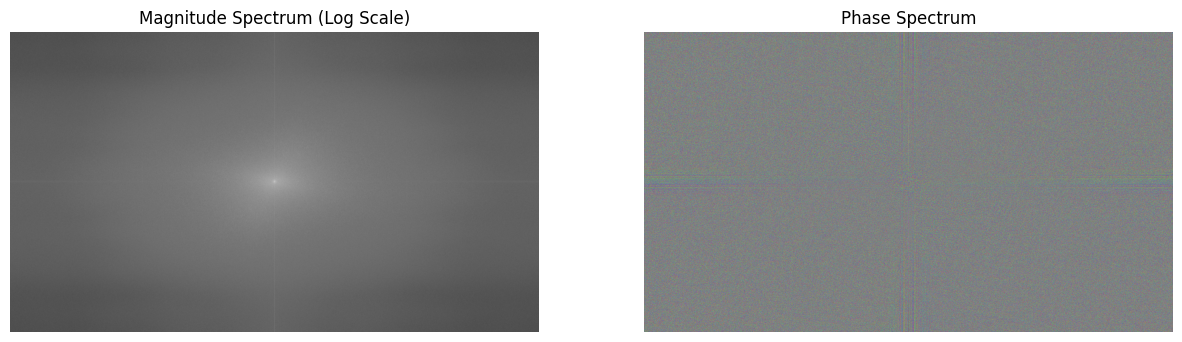

Shape of fshift (FFT output): (3411, 6000)
Shape of magnitude_spectrum: (3411, 6000)
Shape of phase_spectrum: (3411, 6000)


In [2]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

# Ensure gray_cv2 is available from Part A execution
# If running this cell independently, uncomment and run the following line to load the image if not already loaded
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# image_path = '/content/pexels-photo-19289109.jpeg'
# img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Load directly as grayscale for testing
# if img is None:
#     print(f"Error: Image not found at {image_path}")
#     exit()
# gray_cv2 = img

if 'gray_cv2' not in locals():
    print("Error: 'gray_cv2' not found. Please run Part A code first.")
else:
    print("Proceeding with Part B...")

    # B1. Compute the FFT of the grayscale image (use NumPy)
    # 1. np.fft.fft2: Compute the 2-D discrete Fourier Transform.
    f = np.fft.fft2(gray_cv2)

    # 2. np.fft.fftshift: Shift the zero-frequency component to the center of the spectrum.
    fshift = np.fft.fftshift(f)

    # 3. Store as fshift (already done above)

    # B2. Compute magnitude, phase and display Magnitude Spectrum
    # Compute the magnitude spectrum: np.abs(fshift)
    # Apply logarithm for better visualization, as magnitude values can vary widely.
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1) # Add 1 to avoid log(0)

    # Compute the phase spectrum
    phase_spectrum = np.angle(fshift)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum (Log Scale)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(phase_spectrum, cmap='hsv') # 'hsv' colormap is often used for phase to show cyclic nature
    plt.title('Phase Spectrum')
    plt.axis('off')

    plt.show()

    print(f"Shape of fshift (FFT output): {fshift.shape}")
    print(f"Shape of magnitude_spectrum: {magnitude_spectrum.shape}")
    print(f"Shape of phase_spectrum: {phase_spectrum.shape}")


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Proceeding with Part C...


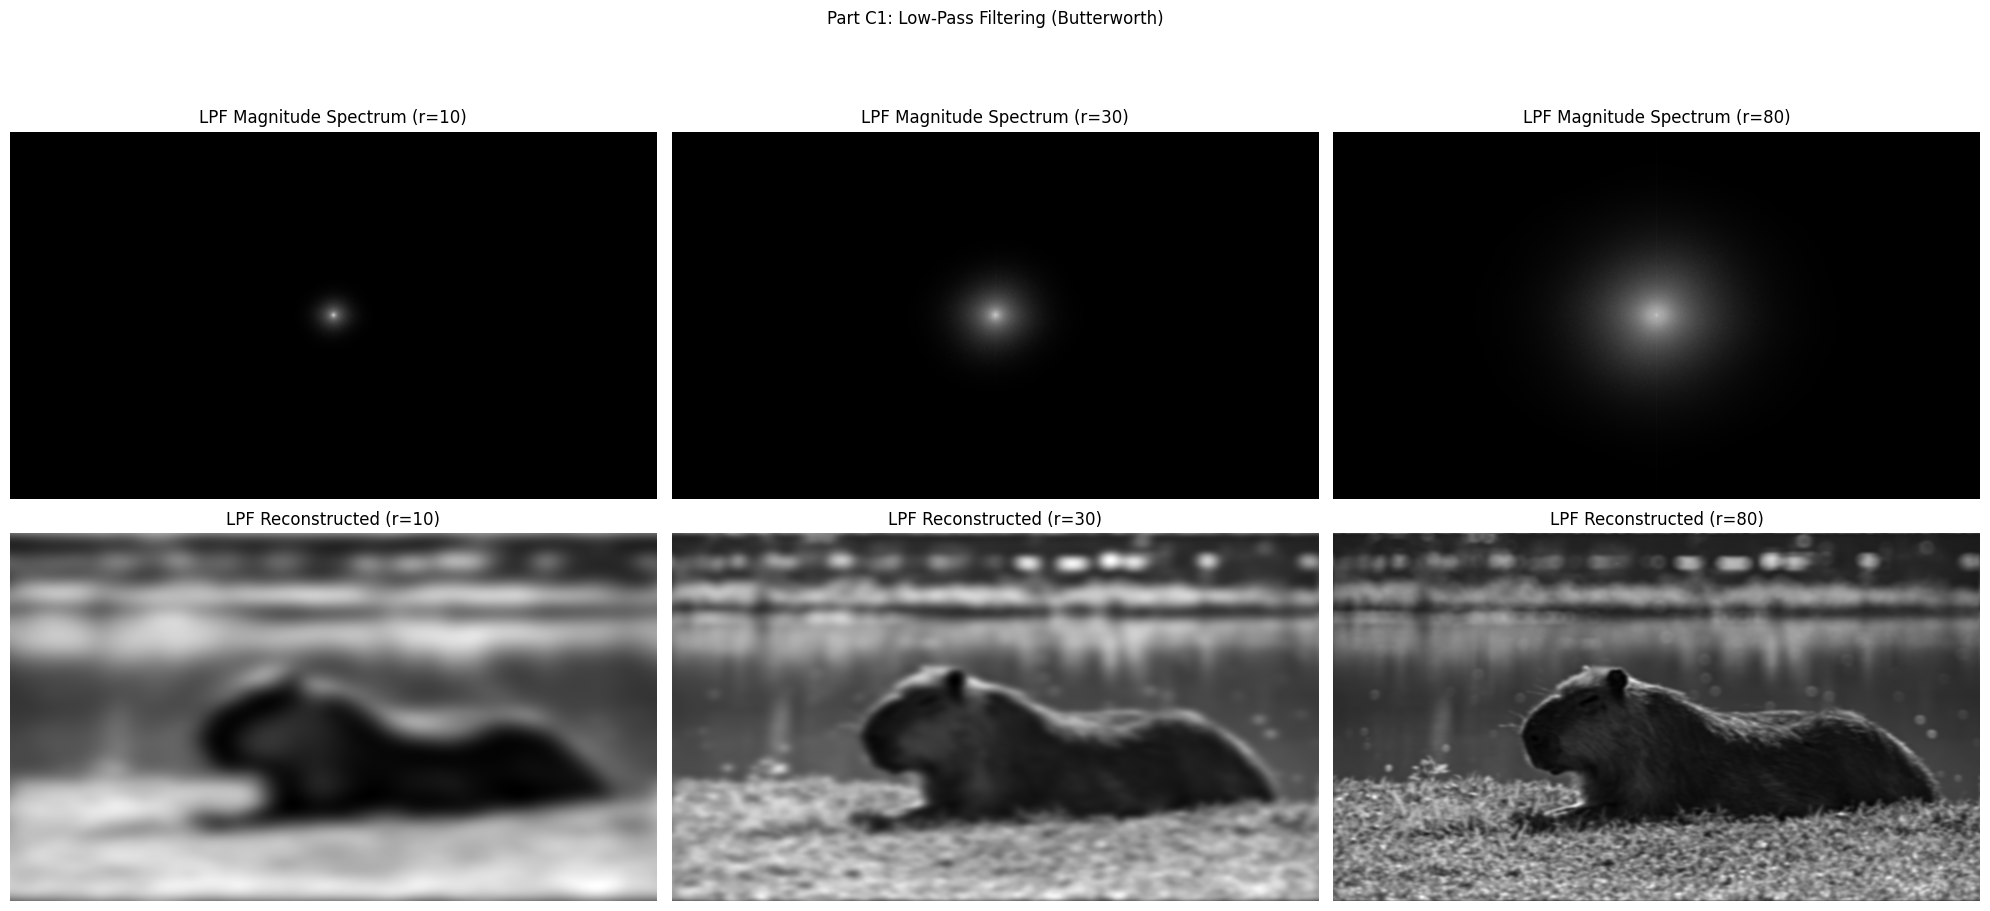

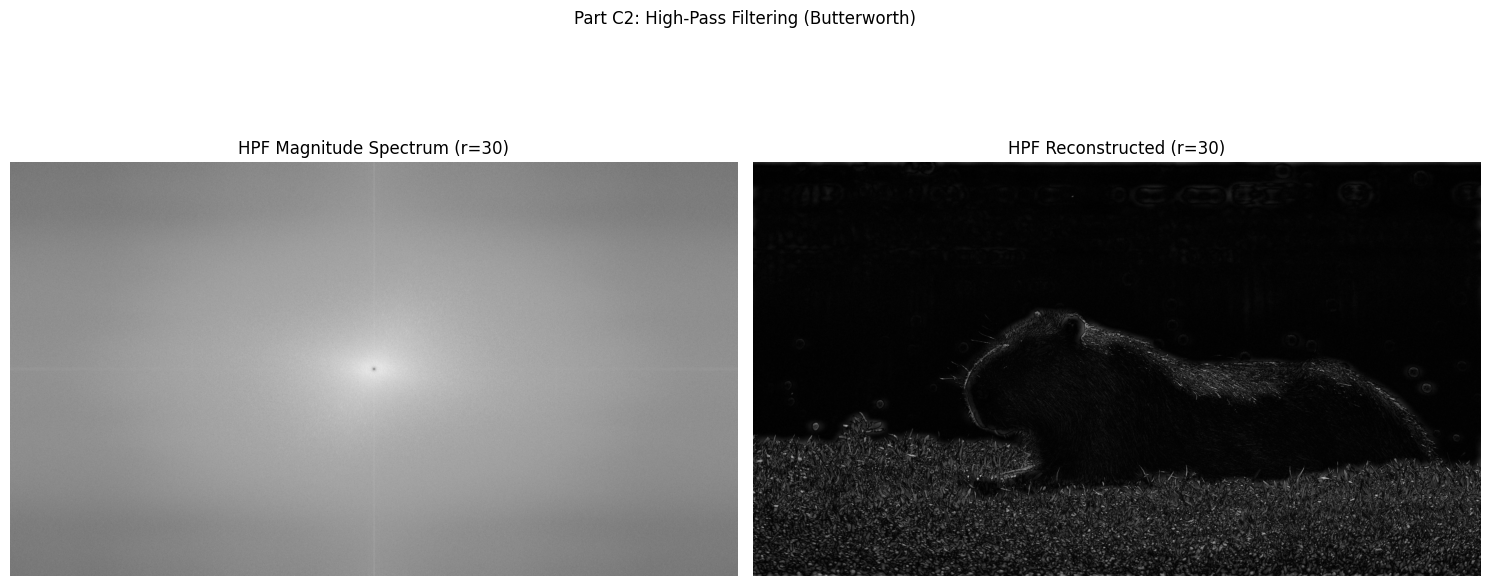

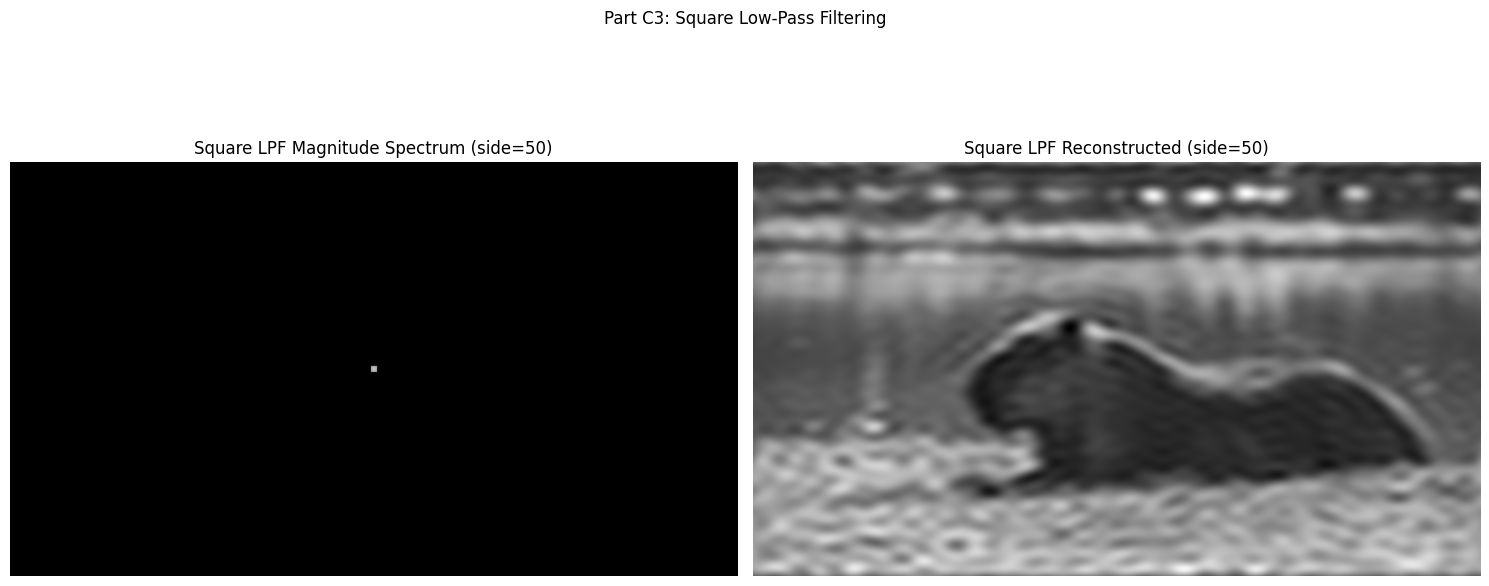

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ensure fshift is available from Part B execution
if 'fshift' not in locals():
    print("Error: 'fshift' not found. Please run Part B code first.")
else:
    print("Proceeding with Part C...")

    rows, cols = gray_cv2.shape
    crow, ccol = rows // 2, cols // 2

    # Helper function for reconstruction from filtered spectrum
    def reconstruct_image(filtered_fshift):
        f_ishift = np.fft.ifftshift(filtered_fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back) # Take the magnitude to get the real image
        return img_back

    # C1. Create 3 LPF masks (Butterworth LPF for smooth transitions)
    # Radii of filter: 10, 30, 80
    radii = [10, 30, 80]
    n = 2 # Order of Butterworth filter

    plt.figure(figsize=(20, 10))

    for i, r in enumerate(radii):
        # Create a Butterworth LPF mask
        # Distance matrix
        x = np.arange(cols)
        y = np.arange(rows)
        X, Y = np.meshgrid(x - ccol, y - crow)
        D = np.sqrt(X**2 + Y**2)
        H = 1 / (1 + (D / r)**(2*n)) # Butterworth Low-Pass Filter

        # Apply mask to fshift
        fshift_filtered = fshift * H

        # Reconstruct using ifftshift + ifft2
        img_reconstructed = reconstruct_image(fshift_filtered)

        # Display results
        plt.subplot(2, len(radii), i + 1)
        plt.imshow(20 * np.log(np.abs(fshift_filtered) + 1), cmap='gray')
        plt.title(f'LPF Magnitude Spectrum (r={r})')
        plt.axis('off')

        plt.subplot(2, len(radii), i + 1 + len(radii))
        plt.imshow(img_reconstructed, cmap='gray')
        plt.title(f'LPF Reconstructed (r={r})')
        plt.axis('off')

        # Show blur levels increasing as radius decreases ( think why and write reason in code comment )
        # Reason: A smaller radius 'r' for the Low-Pass Filter means that fewer high-frequency components
        # are allowed to pass through the filter (the filter cuts off more aggressively at lower frequencies).
        # High-frequency components correspond to fine details and edges in the image. By removing more
        # of these high frequencies, the reconstructed image loses its sharp details and appears more blurred.
        # Conversely, a larger radius allows more high frequencies, resulting in a sharper image.
    plt.suptitle('Part C1: Low-Pass Filtering (Butterworth)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # C2. Create HPF mask
    plt.figure(figsize=(15, 7))
    hpf_radius = 30 # Example radius for HPF

    # Create a Butterworth HPF mask
    x = np.arange(cols)
    y = np.arange(rows)
    X, Y = np.meshgrid(x - ccol, y - crow)
    D = np.sqrt(X**2 + Y**2)
    H_hpf = 1 - (1 / (1 + (D / hpf_radius)**(2*n))) # Butterworth High-Pass Filter (1 - LPF)

    # Apply to fshift
    fshift_hpf_filtered = fshift * H_hpf

    # Reconstruct
    img_hpf_reconstructed = reconstruct_image(fshift_hpf_filtered)

    # Display results
    plt.subplot(1, 2, 1)
    plt.imshow(20 * np.log(np.abs(fshift_hpf_filtered) + 1), cmap='gray')
    plt.title(f'HPF Magnitude Spectrum (r={hpf_radius})')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_hpf_reconstructed, cmap='gray')
    plt.title(f'HPF Reconstructed (r={hpf_radius})')
    plt.axis('off')
    plt.suptitle('Part C2: High-Pass Filtering (Butterworth)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # C3. Create a square LPF mask
    plt.figure(figsize=(15, 7))
    side_length = 50

    # Create a square LPF mask
    mask_square_lpf = np.zeros((rows, cols), dtype=np.uint8)
    x_start = ccol - side_length // 2
    x_end = ccol + side_length // 2
    y_start = crow - side_length // 2
    y_end = crow + side_length // 2
    mask_square_lpf[y_start:y_end, x_start:x_end] = 1

    # Apply to fshift
    fshift_square_filtered = fshift * mask_square_lpf

    # Reconstruct and show the output
    img_square_reconstructed = reconstruct_image(fshift_square_filtered)

    plt.subplot(1, 2, 1)
    plt.imshow(20 * np.log(np.abs(fshift_square_filtered) + 1), cmap='gray')
    plt.title(f'Square LPF Magnitude Spectrum (side={side_length})')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_square_reconstructed, cmap='gray')
    plt.title(f'Square LPF Reconstructed (side={side_length})')
    plt.axis('off')
    plt.suptitle('Part C3: Square Low-Pass Filtering')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

Proceeding with Part D...


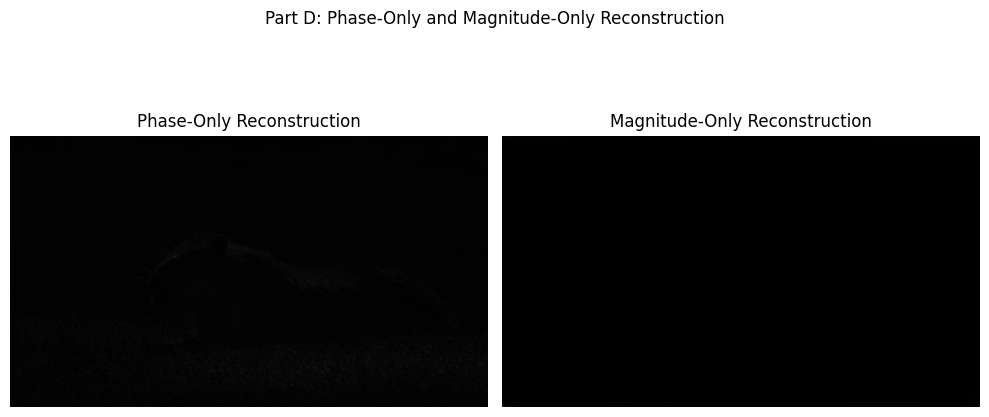

In [4]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

# Ensure fshift is available from Part B execution
if 'fshift' not in locals():
    print("Error: 'fshift' not found. Please run Part B code first.")
else:
    print("Proceeding with Part D...")

    # Helper function for reconstruction from filtered spectrum
    def reconstruct_image_from_complex(complex_spectrum):
        f_ishift = np.fft.ifftshift(complex_spectrum)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back) # Take the magnitude to get the real image
        # Normalize for display
        img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        return img_back

    # D1. Phase-only reconstruction
    # Use: phase_only = fshift / np.abs(fshift)
    phase_only_spectrum = fshift / np.abs(fshift) # This is equivalent to np.exp(1j * np.angle(fshift))

    # 1. Reconstruct and display.
    img_phase_only = reconstruct_image_from_complex(phase_only_spectrum)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_phase_only, cmap='gray')
    plt.title('Phase-Only Reconstruction')
    plt.axis('off')

    # 2. Also in code comments, mention the difference between this code line and the one in the lecture : np.angle(f_shift)
    # Difference:
    # `fshift / np.abs(fshift)` computes the complex exponential `e^(j*phase)` (i.e., `cos(phase) + j*sin(phase)`),
    # which retains the phase information as a complex number with magnitude 1. This is the correct form to reconstruct
    # an image using only phase. It maintains the complex nature required for inverse FFT.
    # `np.angle(fshift)` simply extracts the phase angle in radians as a real-valued array. It does not
    # create a complex number suitable for direct inverse FFT reconstruction on its own, as it lacks the complex structure.
    # To reconstruct with `np.angle(fshift)`, you would need to combine it with a unit magnitude (e.g., `np.exp(1j * np.angle(fshift))`).

    # 3. Try reconstruction from np.angle(f_shift) once and explain your output in code comments.
    # If we were to try reconstructing directly from `np.angle(fshift)` (which is a real array),
    # and then apply `np.fft.ifft2`, the result would be meaningless as the input to ifft2 needs to be complex.
    # The function `reconstruct_image_from_complex` implicitly expects a complex input.
    # If you try to pass `np.angle(fshift)` directly, `np.fft.ifft2` would likely treat it as real components
    # or raise an error depending on the exact implementation, but it would not yield a recognizable image.
    # To properly use np.angle(fshift) for reconstruction, one must first convert it back to a complex exponential:
    # `complex_phase = np.exp(1j * np.angle(fshift))` and then pass `complex_phase` to `reconstruct_image_from_complex`.
    # The current `phase_only_spectrum` line does exactly this in a more concise way.

    # D2. Magnitude-only reconstruction
    # Use: mag_only = np.abs(fshift)
    # To reconstruct using only magnitude, we combine the magnitude with a constant phase (e.g., all zeros or all ones).
    # The simplest way to reconstruct with only magnitude is to use the original magnitude and a phase of zero everywhere (e^(j*0) = 1).
    # This means the complex spectrum for magnitude-only reconstruction would be `np.abs(fshift) * (cos(0) + j*sin(0))` which simplifies to `np.abs(fshift)`
    magnitude_only_spectrum = np.abs(fshift) # This effectively sets phase to 0 for all frequencies

    # 1. Reconstruct and display.
    img_magnitude_only = reconstruct_image_from_complex(magnitude_only_spectrum)

    plt.subplot(1, 2, 2)
    plt.imshow(img_magnitude_only, cmap='gray')
    plt.title('Magnitude-Only Reconstruction')
    plt.axis('off')
    plt.suptitle('Part D: Phase-Only and Magnitude-Only Reconstruction')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.
    # The logarithm is used in the magnitude spectrum display (e.g., in Part B) because the range of magnitude values
    # can be extremely large, spanning many orders of magnitude. Taking the logarithm compresses this dynamic range,
    # making it possible to visualize both very strong (low-frequency) and very weak (high-frequency) components
    # simultaneously on a single image. Without the logarithm, the strong central low-frequency components would
    # dominate the display, making the weaker but important high-frequency details invisible.
    # The magnitude-only reconstruction here (`img_magnitude_only`) looks different from the `magnitude_spectrum` plot
    # because `img_magnitude_only` is a spatial domain image reconstructed from *only* the magnitude information
    # (with implied zero phase), whereas `magnitude_spectrum` is a visualization of the frequency domain data itself
    # (usually log-scaled for visibility) and not a reconstructed image. The reconstructed image shows what the image
    # would look like if only its frequency amplitude was retained, and all phase information was lost. It typically
    # looks like a blurry blob because it loses all positional information, but retains brightness/texture information.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

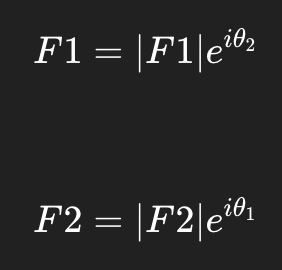

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.